# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AffinityPropagation

In [3]:
mall_df_raw = pd.read_csv('data/Mall_Customers.csv')
mall_df = mall_df_raw
mall_df = mall_df.drop(['CustomerID'], axis=1)
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
mall_df1 = pd.get_dummies(mall_df, columns=["Gender"])
mall_df1

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [13]:
mall_df1['Age group'] = pd.cut(x=mall_df1['Age'], bins=[1, 25, 35, 50])
mall_df1

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans,Age group
0,19,15,39,0,1,3,"(1, 25]"
1,21,15,81,0,1,3,"(1, 25]"
2,20,16,6,1,0,0,"(1, 25]"
3,23,16,77,1,0,3,"(1, 25]"
4,31,17,40,1,0,0,"(25, 35]"
...,...,...,...,...,...,...,...
195,35,120,79,1,0,1,"(25, 35]"
196,45,126,28,1,0,2,"(35, 50]"
197,32,126,74,0,1,1,"(25, 35]"
198,32,137,18,0,1,2,"(25, 35]"


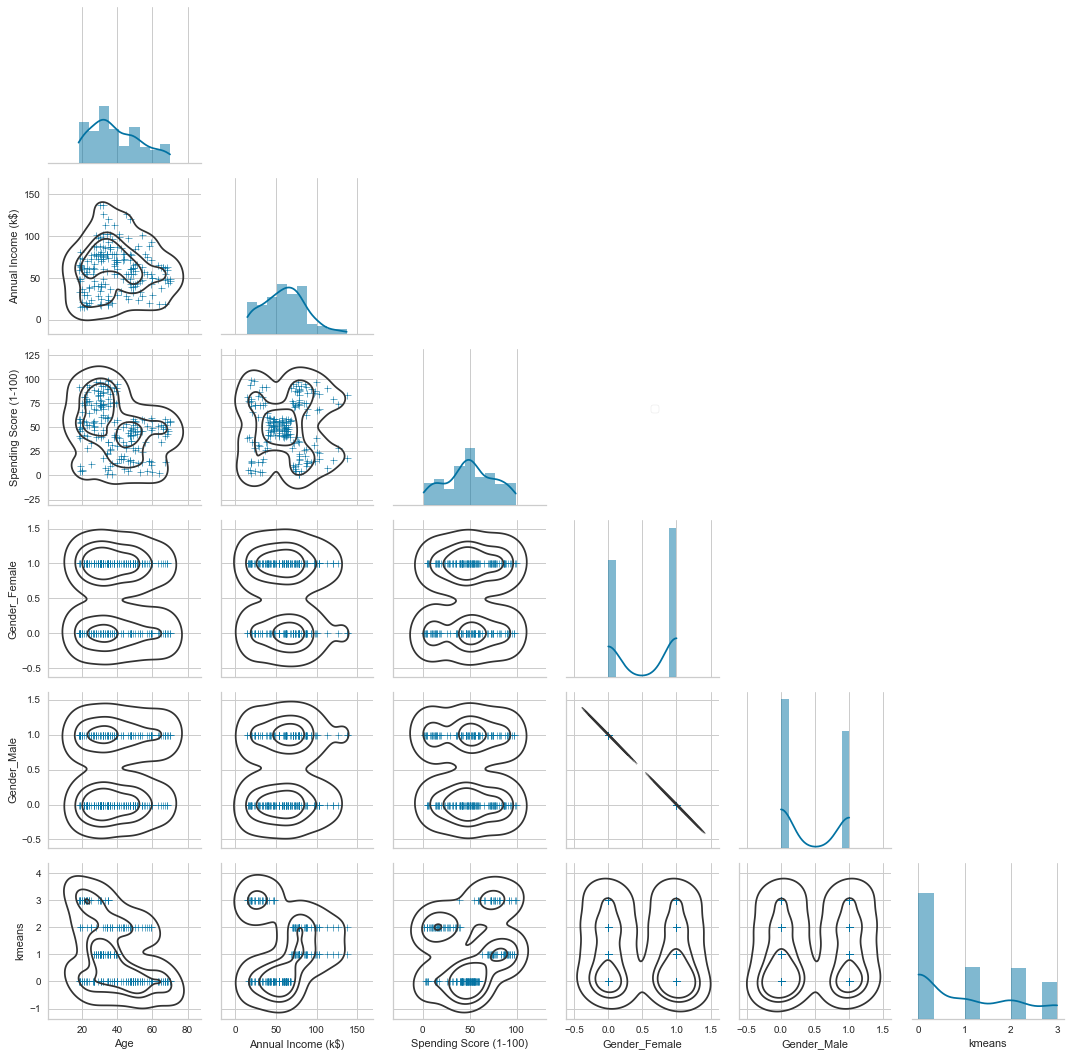

In [15]:
g = sns.PairGrid(data = mall_df1, corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

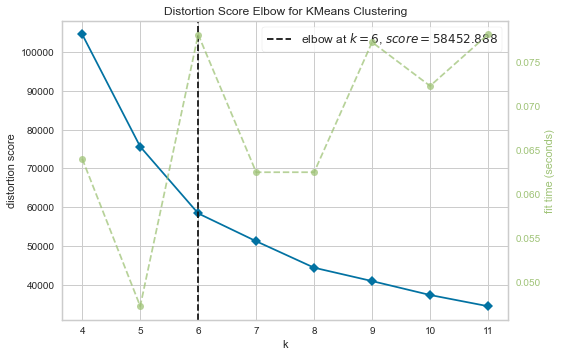

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
X = mall_df1.drop(['Age group'], axis=1)

# Fit the data to the visualizer
visualizer.fit(X)        
visualizer.show()

In [27]:
#K-means
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

# kmeans.labels_
# kmeans.cluster_centers_

#Calcul silhouette score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
score

0.451696951169371

In [22]:
#AffinityPropagation
from sklearn.cluster import AffinityPropagation
AffinityPropagation = AffinityPropagation(random_state=5)
AffinityPropagation.fit(X)

AffinityPropagation.labels_
AffinityPropagation.predict
AffinityPropagation.cluster_centers_

# Calcul silhouette score
score = silhouette_score(X, AffinityPropagation.labels_, metric='euclidean')
score

0.34541693864378525

In [28]:
mall_df1['kmeans'] = kmeans.labels_
mall_df1

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans,Age group
0,19,15,39,0,1,5,"(1, 25]"
1,21,15,81,0,1,0,"(1, 25]"
2,20,16,6,1,0,5,"(1, 25]"
3,23,16,77,1,0,0,"(1, 25]"
4,31,17,40,1,0,5,"(25, 35]"
...,...,...,...,...,...,...,...
195,35,120,79,1,0,3,"(25, 35]"
196,45,126,28,1,0,1,"(35, 50]"
197,32,126,74,0,1,3,"(25, 35]"
198,32,137,18,0,1,1,"(25, 35]"


<AxesSubplot:xlabel='Age group', ylabel='count'>

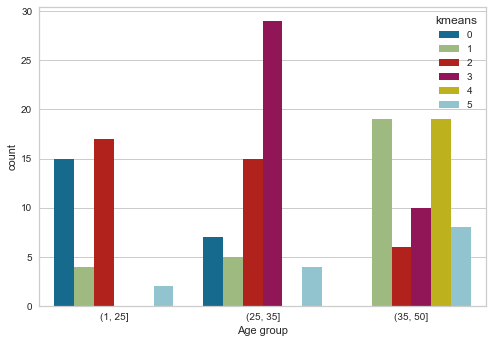

In [32]:
sns.countplot(x="Age group", hue="kmeans", data=mall_df1)

In [39]:
mall_df_c0 = mall_df1[mall_df1['kmeans'] == 0]
mall_df_c1 = mall_df1[mall_df1['kmeans'] == 1]
mall_df_c2 = mall_df1[mall_df1['kmeans'] == 2]
mall_df_c3 = mall_df1[mall_df1['kmeans'] == 3]
mall_df_c4 = mall_df1[mall_df1['kmeans'] == 4]
mall_df_c5 = mall_df1[mall_df1['kmeans'] == 5]

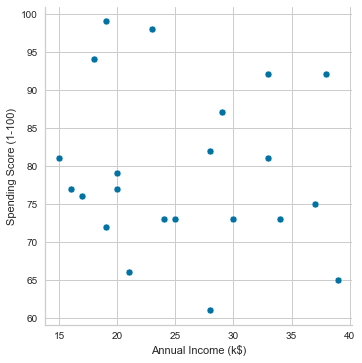

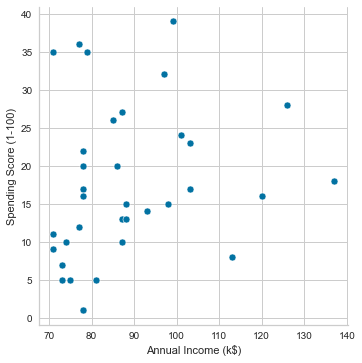

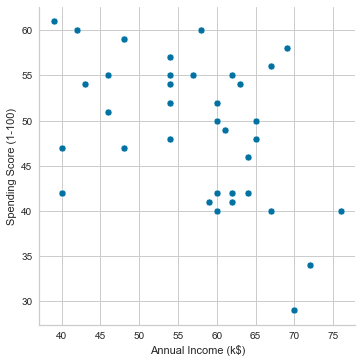

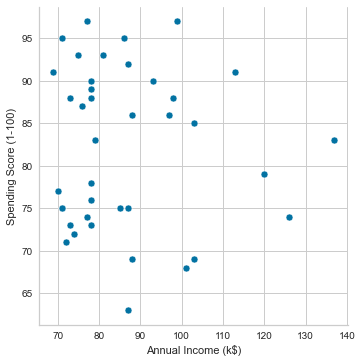

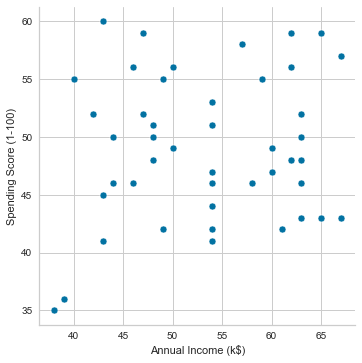

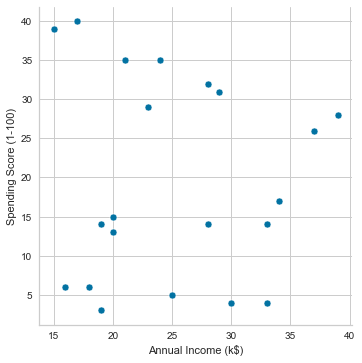

In [40]:
sns.relplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=mall_df_c0)
sns.relplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=mall_df_c1)
sns.relplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=mall_df_c2)
sns.relplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=mall_df_c3)
sns.relplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=mall_df_c4)
sns.relplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=mall_df_c5)

# Conclusions